In [1]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow import keras

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


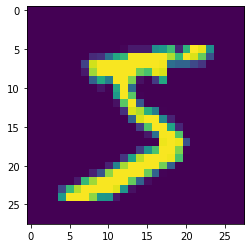

In [5]:
plt.imshow(X_train[0])

In [6]:
y_train[0]

5

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

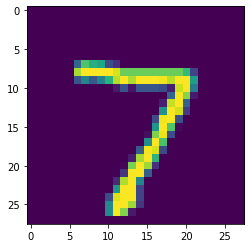

In [9]:
plt.imshow(X_test[0])

In [10]:
y_test[0]

7

In [11]:
X_train = X_train/255

In [12]:
X_test = X_test/255

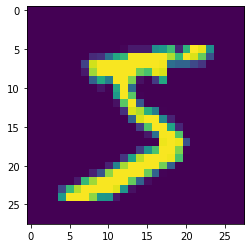

In [13]:
plt.imshow(X_train[0])

In [14]:
y_train[0]

5

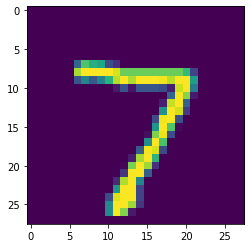

In [15]:
plt.imshow(X_test[0])

In [16]:
y_test[0]

7

In [17]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [26]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_split=0.2
)

Epoch 1/50
1500/1500 [==============================] - 6s 4ms/step - loss: 7.2081e-05 - accuracy: 1.0000 - val_loss: 0.1658 - val_accuracy: 0.9778
Epoch 2/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0062 - accuracy: 0.9983 - val_loss: 0.1834 - val_accuracy: 0.9766
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.1844 - val_accuracy: 0.9758
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 3.1885e-04 - accuracy: 0.9999 - val_loss: 0.1661 - val_accuracy: 0.9786
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.2012 - val_accuracy: 0.9772
Epoch 6/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.1729 - val_accuracy: 0.9782
Epoch 7/50
1500/1500 [==============================] - 10s 6ms/step - loss: 2.8742e-04 - accuracy: 0.9999 - val_loss: 0.1660 - 

In [21]:
predicted = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [22]:
predicted

array([[2.69078024e-20, 1.37739103e-21, 1.21472345e-20, ...,
        9.99999940e-01, 2.92054695e-20, 2.34223039e-17],
       [1.40076857e-22, 1.34248013e-20, 9.99999940e-01, ...,
        0.00000000e+00, 4.29110670e-19, 0.00000000e+00],
       [3.48180740e-13, 9.99997675e-01, 2.29964634e-08, ...,
        2.11454312e-06, 5.96622840e-08, 1.35717912e-18],
       ...,
       [1.71278371e-38, 3.85509003e-25, 1.69646442e-28, ...,
        3.45752562e-18, 4.78037596e-20, 2.68057690e-12],
       [2.57101884e-36, 2.52513843e-38, 0.00000000e+00, ...,
        1.13207076e-33, 8.52308343e-19, 1.19663344e-37],
       [1.79738013e-23, 8.17541178e-38, 7.74318156e-25, ...,
        6.99086350e-35, 2.76627329e-24, 2.74222507e-38]], dtype=float32)

In [23]:
max_pred_val = predicted.argmax(axis=1)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test, max_pred_val)

0.9791

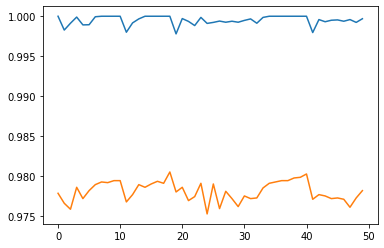

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

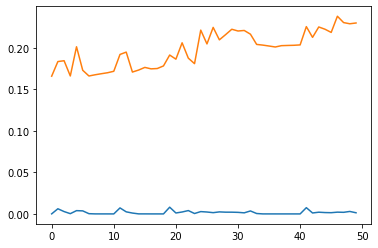

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

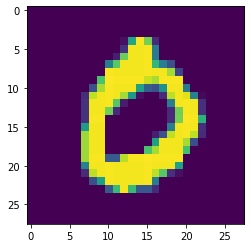

In [36]:
plt.imshow(X_test[3])

In [37]:
model.predict(X_test[3]).argmax(axis=1)

1/1 [==============================] - 0s 22ms/step


array([0])